#Exploratory Data Anaylsis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
df = pd.read_excel("Churn.xlsx")

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Look for missing values and try to handle them

In [ ]:
df.isna().sum().sum()
0

0

The dataset we are using is pre-cleaned so I think there is no missing value

There is no missing value in the data set so we can jump to explore it. We can start with the target variable

In [ ]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Target variable has imbalanced class distribution. Positive class (Churn=Yes) is much less than negative class (churn=No)

 first discover the features that only have two values.

In [ ]:
columns = df.columns
binary_cols = []
for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [ ]:
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

check the class distribution of binary features.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

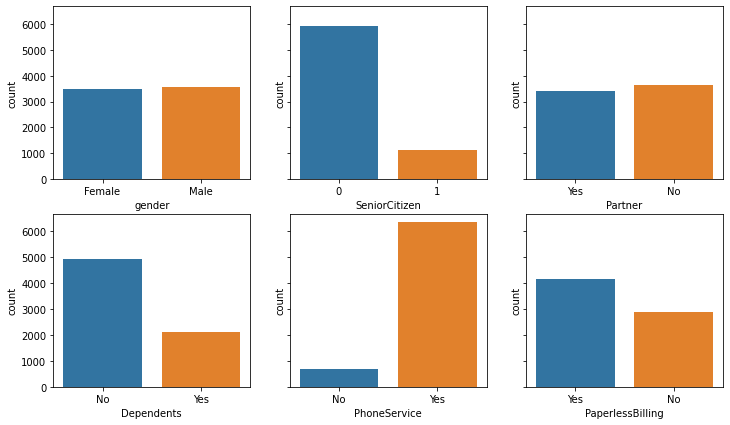

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])

There is a high imbalance in SeniorCitizen and PhoneService variables. Most of the customers are not senior and similarly, most customers have a phone service.
It is better to check how the target variable (churn) changes according to the binary features. To be able to make calculations, we need to change the values of target variable. “Yes” will be 1 and “No” will be 0.

In [ ]:
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)

In [ ]:
for i in range(len(binary_cols)-1):
  print(df[[binary_cols[i],'Churn']].groupby(binary_cols[i]).mean())


           Churn
gender          
Female  0.269209
Male    0.261603
                  Churn
SeniorCitizen          
0              0.236062
1              0.416813
            Churn
Partner          
No       0.329580
Yes      0.196649
               Churn
Dependents          
No          0.312791
Yes         0.154502
                 Churn
PhoneService          
No            0.249267
Yes           0.267096
                     Churn
PaperlessBilling          
No                0.163301
Yes               0.335651


Average churn rate for males and females are approximately the same which indicates gender variable does not bring a valuable prediction power to a model. Therefore, I will not use gender variable in the machine learning model.

**Other categorical variables**

There are 6 variables that come with internet service which are StreamingTV, StreamingMovies, OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport. There variables come into play if customer has internet service.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


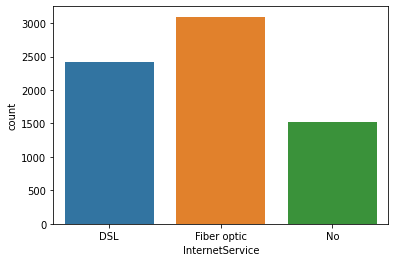

In [ ]:
sns.countplot("InternetService", data=df)

In [ ]:
df[['InternetService','Churn']].groupby(['InternetService']).mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


Internet service variable is definitely important in predicting churn rate. As you can see, customers with fiber optic internet service are much likely to churn than other customers although there is not a big difference in the number of customers with DSL and fiber optic. This company may have some problems with fiber optic connection. Let’s also check the monthly charges.


**Fiber optic service is much more expensive than DSL which may be one of the reasons why customers churn.**

In [ ]:
df[['InternetService','MonthlyCharges']].groupby(['InternetService']).mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


now check the distributions of internet service related variables:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

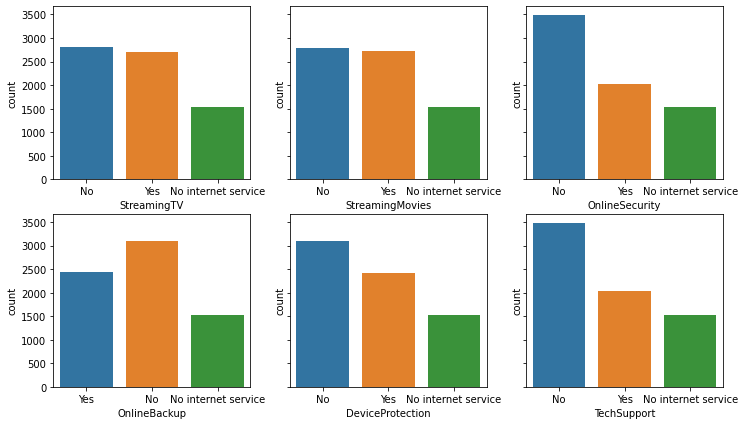

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("StreamingTV", data=df, ax=axes[0,0])
sns.countplot("StreamingMovies", data=df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot("OnlineBackup", data=df, ax=axes[1,0])
sns.countplot("DeviceProtection", data=df, ax=axes[1,1])
sns.countplot("TechSupport", data=df, ax=axes[1,2])

All internet service related features seem to have different churn rates for their classes because churn rate changes according to customers having these services. The difference on StreamingTV and StreamingMovies are not much but they can still bring value to the model. 

In [ ]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [ ]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

If a customer does not have a phone service, he/she cannot have multiple lines. MultipleLines column includes more specific data compared to PhoneService column. So I will not include PhoneService column as I can understand the number of people who have phone service from MultipleLines column. MultipleLines column takes the PhoneService column one step further.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


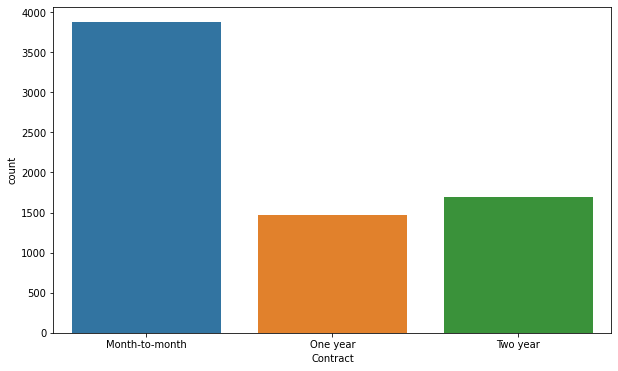

In [ ]:

plt.figure(figsize=(10,6))
sns.countplot("Contract", data=df)

It seems like, customers with short-term contract are more likely to churn. This clearly explains the motivation for companies to have long-term relationship with their customers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


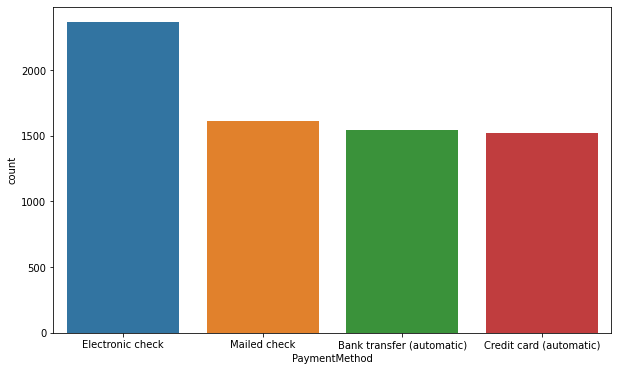

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot("PaymentMethod", data=df)

Customers who pay with electronic check are more likely to churn and this kind of payment is more common than other payment types. Therefore, this segment may be further investigated if customers paying with electronic checks have any other thing in common.

**Continous Features**

The continuous features are tenure, monthly charges and total charges. The amount in total charges column is proportional to tenure (months) multiplied by monthly charges. So it is unnecessary to include total charges in the model.

have a look at the distribution of continuous features.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


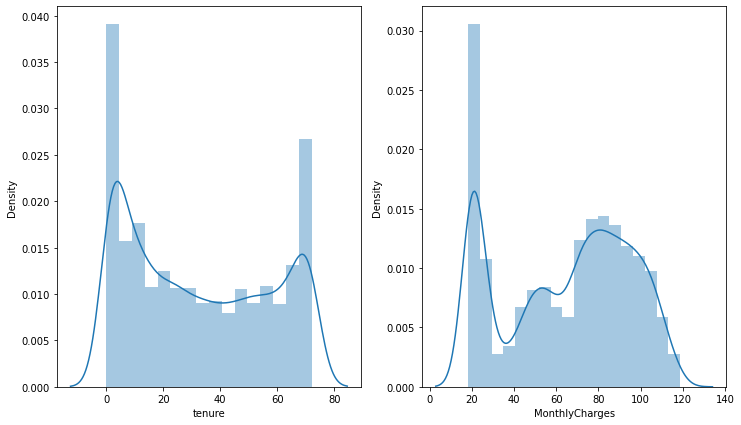

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(df["tenure"], ax=axes[0])
sns.distplot(df["MonthlyCharges"], ax=axes[1])

According to the distribution of tenure variable, most of the customers are either pretty new or have stayed for a long time with the company. Our goal should be finding a way to keep those customers with a tenure of up to a few months.
A similar trend is seen on MonthlyCharges. There seems to be a gap between low rates and high rates.

In [ ]:
df[['Contract','tenure']].groupby(['Contract']).mean()

,tenure
Contract,
Month-to-month,18.036645
One year,42.044807
Two year,56.735103


contract and tenure are highly correlated. Customers with long contracts have been a customer for longer time than customers with short-term contracts. I think contract will add little to no value to tenure feature so I will not use contract feature in the model.

After exploring the variables, I have decided not to use following variable because they add little or no informative power to the model

In [ ]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

#Data Preprocessing


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

Encoding categorical variables

In [ ]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
'MultipleLines', 'InternetService','OnlineSecurity'     ,'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']
X = pd.get_dummies(df, columns=cat_features, drop_first=True)


Scaling continuous variables:

In [ ]:
sc = MinMaxScaler()
a = sc.fit_transform(df[['tenure']])
b = sc.fit_transform(df[['MonthlyCharges']])
X['tenure'] = a
X['MonthlyCharges'] = b

In [ ]:
X.shape

(7043, 26)

**Resampling**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distribution Before Resampling')

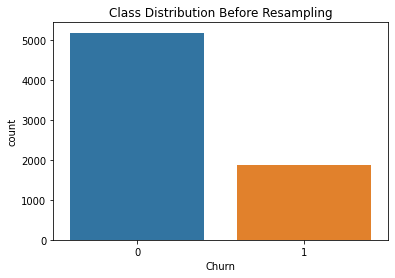

In [ ]:
sns.countplot('Churn', data=df).set_title('Class Distribution Before Resampling')

In [ ]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

In [ ]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

5174


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distribution After Resampling')

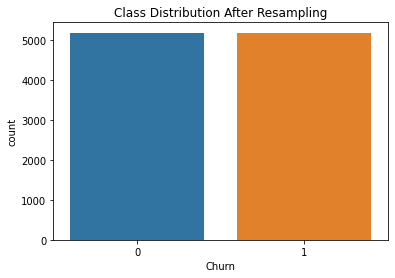

In [ ]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)
sns.countplot('Churn', data=X_upsampled).set_title('Class Distribution After Resampling')

#Model Creation and Evaluation


We need to divide the dataset into training and test subsets so that we are able to measure the performance of our model on new, previously unseen examples.

In [ ]:
from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = X_upsampled['Churn'] #target (dependent variable)

Dividing dataset into train and test subsets:


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Making predictions on training set and evaluating

In [ ]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

0.8874124184585649

Making predictions on test set and evaluating

In [ ]:
pred_test = clf_forest.predict(X_test)
accuracy_score(y_test, pred_test)

0.8444444444444444

The accuracy on training set is 4% higher than the accuracy on test set which indicates a slight overfitting. We can decrease the depth of a tree in the forest because as trees get deeper, they tend to be more specific which results in not generalizing well. However, reducing tree depth may also decrease the accuracy.

#Improving the Model

**Parameter Tuning**

Here we use GridSearchCV provides for parameter tuning. 

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
#Creating a GridSearchCV object
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [ ]:
clf.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
clf.best_params_

{'max_depth': 25, 'n_estimators': 300}

In [ ]:
clf.best_score_

0.8992082338080195

**We have achieved an overall accuracy of almost 90%**

Observations

1.From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn. 

2.Internet service variable is definitely important in predicting churn rate. As you can see, customers with fiber optic internet service are much likely to churn than other customers although there is not a big difference in the number of customers with DSL and fiber optic. This company may have some problems with fiber optic connection. Let’s also check the monthly charges.

3.It seems like, customers with short-term contract are more likely to churn. This clearly explains the motivation for companies to have long-term relationship with their customers.

4.Customers who pay with electronic check are more likely to churn and this kind of payment is more common than other payment types. Therefore, this segment may be further investigated if customers paying with electronic checks have any other thing in common.

5.According to the distribution of tenure variable, most of the customers are either pretty new or have stayed for a long time with the company. Our goal should be finding a way to keep those customers with a tenure of up to a few months.